<a href="https://colab.research.google.com/github/uzair011/PyTorch-fndmntl/blob/main/PyTorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(torch.__version__)

2.0.1+cu118


# Introduction to Tensors

Tensors

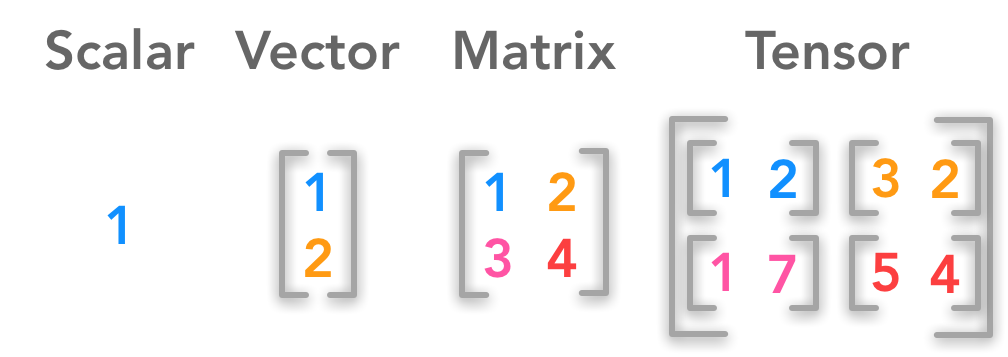

In [60]:
# 1. scalar
# creating
scalar = torch.tensor(2)
scalar

tensor(2)

In [61]:
# number of dimensions of a tensor
scalar.ndim

0

In [62]:
# get tensor as python INT
scalar.item()

2

In [63]:
# 2. Vector
vector = torch.tensor([3, 9])
vector

tensor([3, 9])

In [64]:
vector.ndim

1

In [65]:
vector.shape

torch.Size([2])

In [66]:
# 3. MATRIX
MATRIX = torch.tensor([[1, 5], 
                       [4, 9]])
MATRIX

tensor([[1, 5],
        [4, 9]])

In [67]:
MATRIX.ndim

2

In [68]:
MATRIX.shape

torch.Size([2, 2])

In [69]:
print(MATRIX[1])
print(MATRIX[1][0])

tensor([4, 9])
tensor(4)


In [70]:
# 4. TENSOR
TENSOR = torch.tensor([[[ 2, 3, 9],
                        [4, 1, 8],
                        [7, 6, 3]]])
TENSOR

tensor([[[2, 3, 9],
         [4, 1, 8],
         [7, 6, 3]]])

In [71]:
TENSOR.ndim

3

In [72]:
TENSOR.shape

torch.Size([1, 3, 3])

In [73]:
print(TENSOR[0])
print()
print("Accessing the tensor 8 :",  TENSOR[0][1][2])

tensor([[2, 3, 9],
        [4, 1, 8],
        [7, 6, 3]])

Accessing the tensor 8 : tensor(8)


In [74]:
TENSOR2 = torch.tensor([[[9, 99, 999],
                        [2, 22, 222],
                        [5, 55, 555]],

                       [[1, 11, 111],
                        [8, 88, 888],
                        [4, 44, 444]],

                        [[6, 88, 444],
                        [3, 00, 888],
                        [1, 33, 555]]])

TENSOR2 

tensor([[[  9,  99, 999],
         [  2,  22, 222],
         [  5,  55, 555]],

        [[  1,  11, 111],
         [  8,  88, 888],
         [  4,  44, 444]],

        [[  6,  88, 444],
         [  3,   0, 888],
         [  1,  33, 555]]])

In [75]:
TENSOR2.ndim

3

In [76]:
TENSOR2.shape

torch.Size([3, 3, 3])

In [77]:
print("Accessing tensor 4: ",TENSOR2[1][2][0])

Accessing tensor 4:  tensor(4)


**RANDOM TENSORS**

Why Random Tensors? 

*Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.*

`starts with random numbers => look at data => update random numbers => look at data => update random numbers`

In [78]:
# Create a random tensor size of (3, 5)

random_tensor = torch.rand(3, 5)
random_tensor

tensor([[0.0729, 0.2172, 0.8067, 0.1147, 0.8276],
        [0.1686, 0.4071, 0.4921, 0.8381, 0.7726],
        [0.9189, 0.3318, 0.6498, 0.1541, 0.9107]])

In [79]:
random_image_size_tensor = torch.rand(size = (3, 223, 230))  #  colour channels(RED, GREEN, BLUE (RGB = 3)), height, width
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 223, 230]), 3)

In [80]:
# Create an ALL ZEROs tensor
zeros = torch.zeros( 3, 5)
print(zeros)
print("Multiplication :",zeros * random_tensor)  # Used to mask 1 or more rows or columns in a torch-array

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
Multiplication : tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [81]:
# Create an All ONEs tensor
ones = torch.ones(3, 5)
print(ones)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [82]:
 ones.dtype

torch.float32

**Creating a range of tensors or tensors-like**

In [83]:
# use torch.range
one_to_twelve = torch.arange(0, 12,3)
print(one_to_twelve)

zeros_like = torch.ones_like(input=one_to_twelve)
print(zeros_like)

tensor([0, 3, 6, 9])
tensor([1, 1, 1, 1])


### Tensor DATA Types 

* 3 main errors we'll run into in deep learning/ pytorch
1. Tensors not in right datatype.
2. Tensors not in right shape.
3. Tensors not on the right device.

In [84]:
float_32_tensor = torch.tensor([2.0, 4.5, 3], dtype=None, device=None, requires_grad=False)
print(float_32_tensor)
print(float_32_tensor.dtype)

tensor([2.0000, 4.5000, 3.0000])
torch.float32


In [85]:
float_32_tensor = torch.tensor([2.0, 4.5, 3], dtype=torch.float16)
print(float_32_tensor)
print(float_32_tensor.dtype)

tensor([2.0000, 4.5000, 3.0000], dtype=torch.float16)
torch.float16


In [86]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor.dtype

torch.float16

In [87]:
tensor_multip = float_32_tensor * float_16_tensor
tensor_multip

tensor([ 4.0000, 20.2500,  9.0000], dtype=torch.float16)

In [88]:
int_32_tensor = torch.tensor([2, 8, 9], dtype=torch.int32)
int_32_tensor

tensor([2, 8, 9], dtype=torch.int32)

In [89]:
dif_multip = int_32_tensor * float_16_tensor
dif_multip

tensor([ 4., 36., 27.], dtype=torch.float16)

In [90]:
dif_div =  int_32_tensor / float_16_tensor
dif_div

tensor([1.0000, 1.7773, 3.0000], dtype=torch.float16)

### Getting information from tensors
1. Tensors not in right datatype - to get datatype from a tensor use `torch.dtype`.
2. Tensors not in right shape- to get shape from a tensor use `torch.shape`.
3. Tensors not on the right devie - to get device from a tensor use `torch.device`.

### Tensor Manipulation (OPERATIONS)

1. Addition
2. Subtraction
3. Multiplication (Element-wise)
4. Division
5. Matrix Multiplication

**Rules for Matrix Multiplication**
1. **Innner dimentions** must match.
  - `(4*3) @ (3*4)` - will work
  - `(3*4) @ (3*4)` - won't work
2. The resulting matrix has the shape of **outer dimentions**.
  - `- (4*3) @ (3*4) => (4 * 4)` 

In [91]:
# Create a tensor and add a number to it
tensor_add = torch.tensor([1, 4, 6])
tensor_add + 20 # torch.add(tensor_add, 20)

tensor([21, 24, 26])

In [92]:
# Create a tensor and multiply by 10
tensor_multp = torch.tensor([1, 4, 6])
tensor_multp * 20  # torch.mul(tensor_multp, 20)

tensor([ 20,  80, 120])

In [93]:
# Create a tensor and subtract by 10
tensor_subt = torch.tensor([1, 4, 6])
tensor_subt -10  # torch.sub(tensor_subt, 20)

tensor([-9, -6, -4])

### Matrix Multiplication (dot product)

In [94]:
tensor = torch.tensor([2, 4, 6])
tensor

tensor([2, 4, 6])

In [95]:
tensor * tensor

tensor([ 4, 16, 36])

In [96]:
tensor.matmul(tensor )

tensor(56)

In [97]:
%%time 
rand_tensor = torch.rand(3, 4)
rand_tensor2 = torch.rand(4, 10)
ans_tens_rand = rand_tensor @ rand_tensor2
print(ans_tens_rand.shape)
print()
print(ans_tens_rand)

torch.Size([3, 10])

tensor([[1.3495, 1.0459, 0.1725, 1.7978, 1.4310, 0.5817, 0.8794, 0.3857, 0.8520,
         1.3021],
        [1.1267, 1.0960, 0.1172, 1.4098, 1.0761, 0.6203, 0.6957, 0.3641, 0.8676,
         1.1022],
        [0.9721, 0.7576, 0.1026, 1.0731, 0.8220, 0.3488, 0.5642, 0.2131, 0.8586,
         1.1955]])
CPU times: user 3.69 ms, sys: 0 ns, total: 3.69 ms
Wall time: 3.78 ms


### Main errors in deep learning - SHAPE Errors

To fix shape issues, we use **transpose** to manipulate the shapes of one of our tensors...
A **transpose** switches the axis or dimentions of the tensor.

In [100]:
tensor_A = torch.tensor([[1, 2],
                        [3, 4],
                        [5, 6]])

tensor_B = torch.tensor([[7, 10],
                        [8, 11],
                        [9, 12]])

tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
#torch.mm(tensor_A, tensor_B)

#RuntimeError                              Traceback (most recent call last)
#<ipython-input-101-d49420418508> in <cell line: 1>()
#----> 1 torch.mm(tensor_A, tensor_B)

#RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [102]:
tensor_B.T.shape

torch.Size([2, 3])

In [106]:
manipulated_tensor = torch.mm(tensor_A, tensor_B.T)
manipulated_tensor, manipulated_tensor.size()

(tensor([[ 27,  30,  33],
         [ 61,  68,  75],
         [ 95, 106, 117]]),
 torch.Size([3, 3]))

In [109]:
print(f"The original shapes are {tensor_A.shape}, {tensor_B.shape}.")
print(f"The manipulated shapes are : B=>{tensor_B.T.shape}, A:=> not changed.")
print(f"Multiplying {tensor_A.shape} @ {tensor_B.T.shape}")
print("Output: =>\n")
multiplyied_tensor = torch.mm(tensor_A, tensor_B.T)
print(f"{multiplyied_tensor} \n")
print(f"Final output shape: {multiplyied_tensor.shape}")


The original shapes are torch.Size([3, 2]), torch.Size([3, 2]).
The manipulated shapes are : B=>torch.Size([2, 3]), A:=> not changed.
Multiplying torch.Size([3, 2]) @ torch.Size([2, 3])
Output: =>

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]]) 

Final output shape: torch.Size([3, 3])
